In [1]:
println("Hello super people!")

Hello super people!


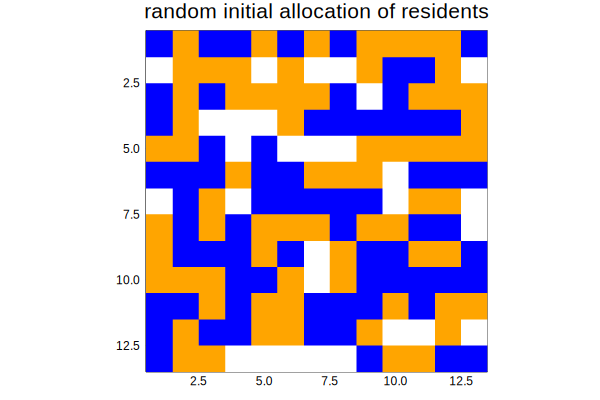

In [1]:
using Random, Plots

#define the grid
#schelling used originally 13x13 grid
GRID_SIZE = 13
CELL_COUNT = 13*13

THRESHOLD_SAME = 5
THRESHOLD_EDGE = 3
THRESHOLD_CORNER = 2

yellow_count = Int(round(CELL_COUNT * 5/(GRID_SIZE-1)))
blue_count = Int(round(CELL_COUNT * 5/(GRID_SIZE-1)))

empty_grid = zeros(GRID_SIZE,GRID_SIZE)
empty_grid[1:yellow_count] .= 1
empty_grid[yellow_count+1:yellow_count+blue_count] .= -1

start_grid = shuffle(empty_grid)

#random initial allocation heatmap viz
#yellow = -1, blue = 1
heatmap(start_grid,title="random initial allocation of residents",
    showaxis=true,xticks=true,yticks=true,yaxis=:flip,aspect_ratio=1.0,framestyle=:box,xlims=(0.5,GRID_SIZE+0.5),legend=nothing,
    c=ColorGradient([:orange,:white,:blue]))


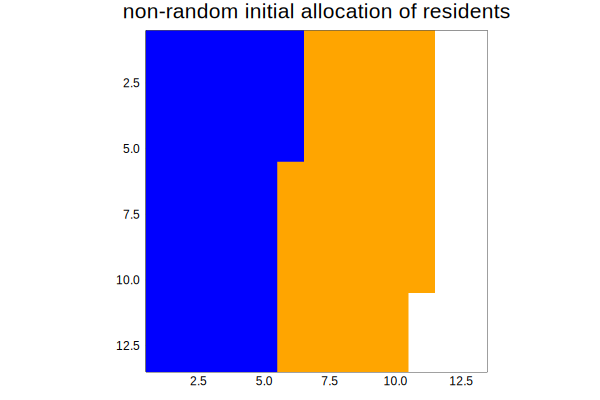

In [2]:
yellow_count = Int(round(CELL_COUNT * 5/(GRID_SIZE-1)))
blue_count = Int(round(CELL_COUNT * 5/(GRID_SIZE-1)))

empty_grid = zeros(GRID_SIZE,GRID_SIZE)
empty_grid[1:yellow_count] .= 1
empty_grid[yellow_count+1:yellow_count+blue_count] .= -1

set_grid = empty_grid#shuffle(empty_grid)

#random initial allocation heatmap viz
#yellow = -1, blue = 1
heatmap(set_grid,title="non-random initial allocation of residents",
    showaxis=true,xticks=true,yticks=true,yaxis=:flip,aspect_ratio=1.0,framestyle=:box,xlims=(0.5,GRID_SIZE+0.5),legend=nothing,
    c=ColorGradient([:orange,:white,:blue]))

In [3]:
#macrostate function mapping (eg, what is the total satisfaction of the residents overall the cells, total sum from zero to max)
#function overall_satisfaction(start_grid)


function grid_satisfaction(start_grid) 
cell_satisfaction = []

for row in 1:GRID_SIZE
    for col in 1:GRID_SIZE
        cell_surrounding = []
        if(!(row == 1 || row == GRID_SIZE || col == 1 || col == GRID_SIZE))#general inner body
            for ii in 0:2
                for jj in 0:2
                    if(!(ii==1 && jj==1))
                        append!(cell_surrounding,start_grid[row-1+(ii),(col-1)+(jj)])
                    end
               
                end
            end
            #println(cell_surrounding)
            if(start_grid[row,col] != 0)
                homogeneous_count = length(findall(start_grid[row,col] .== cell_surrounding))
                if(homogeneous_count >= THRESHOLD_EDGE)
                    append!(cell_satisfaction,1)
                else
                    append!(cell_satisfaction,0)
                end
            else
                append!(cell_satisfaction,0)
            end
        end
        if((row==GRID_SIZE && col==GRID_SIZE))#bottom right corner
            for ii in 0:1
                for jj in 0:1
                    if(!(ii==1 && jj==1))
                        append!(cell_surrounding,start_grid[row-1+(ii),(col-1)+(jj)])
                    end
               
                end
            end
            #println(cell_surrounding)
            if(start_grid[row,col] != 0)
                homogeneous_count = length(findall(start_grid[row,col] .== cell_surrounding))
                if(homogeneous_count >= THRESHOLD_EDGE)
                    append!(cell_satisfaction,1)
                else
                    append!(cell_satisfaction,0)
                end
            else
                append!(cell_satisfaction,0)
            end
        end
        if((row==1 && col==1))#top left corner
            for ii in 1:2
                for jj in 1:2
                    if(!(ii==1 && jj==1))
                        append!(cell_surrounding,start_grid[row-1+(ii),(col-1)+(jj)])
                    end
               
                end
            end
            #println(cell_surrounding)
            if(start_grid[row,col] != 0)
                homogeneous_count = length(findall(start_grid[row,col] .== cell_surrounding))
                if(homogeneous_count >= THRESHOLD_EDGE)
                    append!(cell_satisfaction,1)
                else
                    append!(cell_satisfaction,0)
                end
            else
                append!(cell_satisfaction,0)
            end
        end
        if((row==1 && col==GRID_SIZE))#top right corner
            for ii in 1:2
                for jj in 0:1
                    if(!(ii==1 && jj==1))
                        append!(cell_surrounding,start_grid[row-1+(ii),(col-1)+(jj)])
                    end
               
                end
            end
            #println(cell_surrounding)
            if(start_grid[row,col] != 0)
                homogeneous_count = length(findall(start_grid[row,col] .== cell_surrounding))
                if(homogeneous_count >= THRESHOLD_EDGE)
                    append!(cell_satisfaction,1)
                else
                    append!(cell_satisfaction,0)
                end
            else
                append!(cell_satisfaction,0)
            end
        end
        if((row==GRID_SIZE && col==1))#bottom left corner
            for ii in 0:1
                for jj in 1:2
                    if(!(ii==1 && jj==1))
                        append!(cell_surrounding,start_grid[row-1+(ii),(col-1)+(jj)])
                    end
               
                end
            end
            #println(cell_surrounding)
            if(start_grid[row,col] != 0)
                homogeneous_count = length(findall(start_grid[row,col] .== cell_surrounding))
                if(homogeneous_count >= THRESHOLD_EDGE)
                    append!(cell_satisfaction,1)
                else
                    append!(cell_satisfaction,0)
                end
            else
                append!(cell_satisfaction,0)
            end
        end
        if((row==1 && (col < GRID_SIZE && col > 1) ))#top edge
            for ii in 1:2
                for jj in 0:2
                    if(!(ii==1 && jj==1))
                        append!(cell_surrounding,start_grid[row-1+(ii),(col-1)+(jj)])
                    end
               
                end
            end
            #println(cell_surrounding)
            if(start_grid[row,col] != 0)
                homogeneous_count = length(findall(start_grid[row,col] .== cell_surrounding))
                if(homogeneous_count >= THRESHOLD_EDGE)
                    append!(cell_satisfaction,1)
                else
                    append!(cell_satisfaction,0)
                end
            else
                append!(cell_satisfaction,0)
            end
        end
        if( (row > 1 && row < GRID_SIZE) && (col == 1) )#left edge
            for ii in 0:2
                for jj in 1:2
                    if(!(ii==1 && jj==1))
                        append!(cell_surrounding,start_grid[row-1+(ii),(col-1)+(jj)])
                    end
               
                end
            end
            #println(cell_surrounding)
            
            if(start_grid[row,col] != 0)
                homogeneous_count = length(findall(start_grid[row,col] .== cell_surrounding))
                if(homogeneous_count >= THRESHOLD_EDGE)
                    append!(cell_satisfaction,1)
                else
                    append!(cell_satisfaction,0)
                end
            else
                append!(cell_satisfaction,0)
            end
            
        end
        if( (row > 1 && row < GRID_SIZE) && (col == GRID_SIZE) )#right edge
            for ii in 0:2
                for jj in 0:1
                    if(!(ii==1 && jj==1))
                        append!(cell_surrounding,start_grid[row-1+(ii),(col-1)+(jj)])
                    end
               
                end
            end
            #println(cell_surrounding)
            
            if(start_grid[row,col] != 0)
                homogeneous_count = length(findall(start_grid[row,col] .== cell_surrounding))
                if(homogeneous_count >= THRESHOLD_EDGE)
                    append!(cell_satisfaction,1)
                else
                    append!(cell_satisfaction,0)
                end
            else
                append!(cell_satisfaction,0)
            end
            
        end
        if( (row == GRID_SIZE) && (col > 1 && col < GRID_SIZE) )#bottom edge
            for ii in 0:1
                for jj in 0:2
                    if(!(ii==1 && jj==1))
                        append!(cell_surrounding,start_grid[row-1+(ii),(col-1)+(jj)])
                    end
               
                end
            end
            #println(cell_surrounding)
            
            if(start_grid[row,col] != 0)
                homogeneous_count = length(findall(start_grid[row,col] .== cell_surrounding))
                if(homogeneous_count >= THRESHOLD_EDGE)
                    append!(cell_satisfaction,1)
                else
                    append!(cell_satisfaction,0)
                end
            else
                append!(cell_satisfaction,0)
            end
            
        end
    end
end
#println(cell_satisfaction)
#println(size(cell_satisfaction))
#println(sum(cell_satisfaction))

    return sum(cell_satisfaction)
end

satisfiedOneGrid = grid_satisfaction(start_grid)
println("random grid satisfaction value=",satisfiedOneGrid)
R_MAX = grid_satisfaction(set_grid)
println("set grid satisfaction value=",R_MAX)


random grid satisfaction value=75
set grid satisfaction value=140


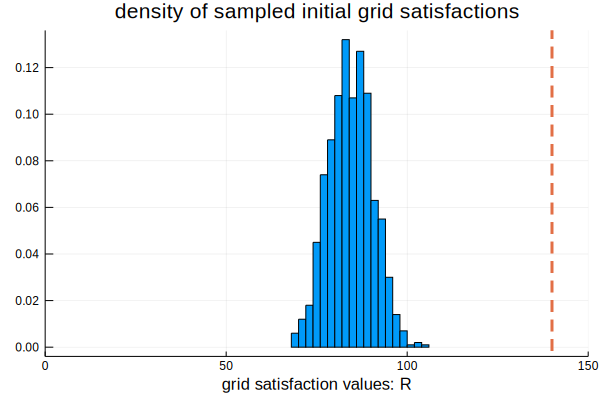

In [4]:
#sample the random intializations and investigate 
function make_random_grid()
    empty_grid = zeros(GRID_SIZE,GRID_SIZE)
    empty_grid[1:yellow_count] .= 1
    empty_grid[yellow_count+1:yellow_count+blue_count] .= -1
    random_grid = shuffle(empty_grid)
    return random_grid
end
numberOfRandomSamples = 1000
randomSatisfactions = [grid_satisfaction(make_random_grid()) for x in 1:numberOfRandomSamples]
normedRandomSatisfactions = randomSatisfactions ./ sum(randomSatisfactions)
pltHist = histogram(randomSatisfactions,normalize=:probability,xlim=(0,R_MAX+10),title="density of sampled initial grid satisfactions",xlabel="grid satisfaction values: R")
vline!([R_MAX],line=(3,:dash),leg=false)

In [5]:
#llok at not the grid level satisfaction but the single cell level satisfaction
function cell_surround_array(grid,row,col)
    #if((row==1 && col==1))#top left corner
    cell_surrounding = []
    for ii in 0:2
        for jj in 0:2
            if(!(  (ii==1 && jj==1) || (row-1+(ii) < 1) ||  (col-1+(jj) < 1) || (row-1+(ii) > GRID_SIZE) || (col-1+(jj) > GRID_SIZE)   ))
                append!(cell_surrounding,grid[row-1+(ii),(col-1)+(jj)])
            end

        end
    end
  
    return cell_surrounding
end

function is_cell_satisfied(grid,row,col)
    cellSurroundArray = cell_surround_array(grid,row,col)
    #println(cellSurroundArray)
    cellType = grid[row,col]
    #println(cellType)
    homogeneity = length(findall(cellType .== cellSurroundArray))
    #println(homogeneity)
    if(cellType != 0)
        if(!(row == 1 || row == GRID_SIZE || col == 1 || col == GRID_SIZE))#general inner body
            return homogeneity >= THRESHOLD_SAME ? 1 : 0
        elseif((row==GRID_SIZE && col==GRID_SIZE))#bottom right corner
            return homogeneity >= THRESHOLD_CORNER ? 1 : 0    
        elseif((row==1 && col==1))#top left corner
            return homogeneity >= THRESHOLD_CORNER ? 1 : 0
        elseif((row==1 && col==GRID_SIZE))#top right corner
            return homogeneity >= THRESHOLD_CORNER ? 1 : 0
        elseif((row==GRID_SIZE && col==1))#bottom left corner
            return homogeneity >= THRESHOLD_CORNER ? 1 : 0
        elseif((row==1 && (col < GRID_SIZE && col > 1) ))#top edge
            return homogeneity >= THRESHOLD_EDGE ? 1 : 0
        elseif( (row > 1 && row < GRID_SIZE) && (col == 1) )#left edge
            return homogeneity >= THRESHOLD_EDGE ? 1 : 0
        elseif( (row > 1 && row < GRID_SIZE) && (col == GRID_SIZE) )#right edge
            return homogeneity >= THRESHOLD_EDGE ? 1 : 0
        elseif( (row == GRID_SIZE) && (col > 1 && col < GRID_SIZE) )#bottom edge
            return homogeneity >= THRESHOLD_EDGE ? 1 : 0
        end
    else
        return 0
    end
end 

cell_satisfied = is_cell_satisfied(start_grid,8,7)
println(cell_satisfied)
 





0


In [17]:
#testing for if a cell would be satisfied if it were placed there
function would_cell_be_satisfied(grid,row,col,cellType)
    cellSurroundArray = cell_surround_array(grid,row,col)    
    #println(cellSurroundArray)
    homogeneity = length(findall(cellType .== cellSurroundArray))    
    #println(homogeneity)
    if(cellType != 0)
        if(!(row == 1 || row == GRID_SIZE || col == 1 || col == GRID_SIZE))#general inner body
            return homogeneity >= THRESHOLD_SAME ? 1 : 0
        elseif((row==GRID_SIZE && col==GRID_SIZE))#bottom right corner
            return homogeneity >= THRESHOLD_CORNER ? 1 : 0    
        elseif((row==1 && col==1))#top left corner
            return homogeneity >= THRESHOLD_CORNER ? 1 : 0
        elseif((row==1 && col==GRID_SIZE))#top right corner
            return homogeneity >= THRESHOLD_CORNER ? 1 : 0
        elseif((row==GRID_SIZE && col==1))#bottom left corner
            return homogeneity >= THRESHOLD_CORNER ? 1 : 0
        elseif((row==1 && (col < GRID_SIZE && col > 1) ))#top edge
            return homogeneity >= THRESHOLD_EDGE ? 1 : 0
        elseif( (row > 1 && row < GRID_SIZE) && (col == 1) )#left edge
            return homogeneity >= THRESHOLD_EDGE ? 1 : 0
        elseif( (row > 1 && row < GRID_SIZE) && (col == GRID_SIZE) )#right edge
            return homogeneity >= THRESHOLD_EDGE ? 1 : 0
        elseif( (row == GRID_SIZE) && (col > 1 && col < GRID_SIZE) )#bottom edge
            return homogeneity >= THRESHOLD_EDGE ? 1 : 0
        end
    else
        return 0
    end
end 

cell_satisfied = would_cell_be_satisfied(start_grid,7,9,start_grid[2,2])
println(cell_satisfied)
 


0


(2,10) is NOT satisfied
----would be satisfied in (7,1)---MOVING
(7,9) is NOT satisfied
----would be satisfied in (13,8)---MOVING
(3,6) is NOT satisfied
----would be satisfied in (12,11)---MOVING
(11,2) is NOT satisfied
----would be satisfied in (7,13)---MOVING
(10,13) is NOT satisfied
----would be satisfied in (8,13)---MOVING
(1,13) is NOT satisfied
----would be satisfied in (3,9)---MOVING
(12,5) is NOT satisfied
----would be satisfied in (12,10)---MOVING
(4,6) is NOT satisfied
----would be satisfied in (9,7)---MOVING
(10,12) is NOT satisfied
----would be satisfied in (13,7)---MOVING
(4,12) is NOT satisfied
(5,2) is NOT satisfied
----would be satisfied in (10,13)---MOVING
(7,11) is NOT satisfied
----would be satisfied in (6,10)---MOVING
(6,7) is NOT satisfied
----would be satisfied in (1,13)---MOVING
(1,8) is NOT satisfied
----would be satisfied in (5,2)---MOVING
(9,6) is NOT satisfied
(3,8) is NOT satisfied
(1,6) is NOT satisfied
(8,5) is NOT satisfied
----would be satisfied in (10,1

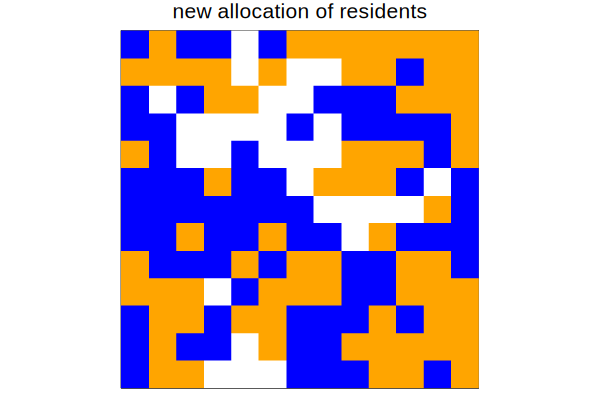

In [22]:
#get non-empty cell set
#Search for an unsatisfied iteratively in all the cells through a shuffled list
#find all empty cells
#shuffle the list of the empty cells
#see if the cell would_cell_be_satisfied in any of the cells in sequence
#no, move on to the next cell
#if yes, change the original cell position to empty and make the new cell the cell type
#loop till all non-empty cells are tested

using Random

function move_cells_for_satisfaction(grid)
    
    newGrid = copy(grid)
    nonZeroCells = findall(grid .!= 0)
    nonZeroCells2 = shuffle(nonZeroCells)
    
    for nzc in nonZeroCells2
        
        isCellSatisfied = is_cell_satisfied(newGrid,nzc[1],nzc[2])
        
        if(isCellSatisfied != 1)
            println("($(nzc[1]),$(nzc[2])) is NOT satisfied")
            #find the empty cell list
            emptyCells = findall(newGrid .== 0)
            emptyCells2 = shuffle(emptyCells)
            #find an empty cell nzc could move to
            for ec in emptyCells2
                
                wouldCellBeSatisfied = would_cell_be_satisfied(newGrid,ec[1],ec[2],newGrid[nzc[1],nzc[2]] )
                if(wouldCellBeSatisfied == 1)  
                    println("----would be satisfied in ($(ec[1]),$(ec[2]))---MOVING")
                    #move cell nzc to the ec cell
                    newGrid[ec[1],ec[2]] = newGrid[nzc[1],nzc[2]]
                    newGrid[nzc[1],nzc[2]] = 0  
                    #no longer try to move it
                    break
                end
                
            end
            
        end
        
    end
    return newGrid
end

newGrid = move_cells_for_satisfaction(start_grid)

heatmap(newGrid,title="new allocation of residents",
    showaxis=true,xticks=false,yticks=false,yaxis=:flip,aspect_ratio=1.0,framestyle=:box,xlims=(0.5,GRID_SIZE+0.5),legend=nothing,
    c=ColorGradient([:orange,:white,:blue]))
satisfiedOneGrid = grid_satisfaction(newGrid)

In [28]:
using Documenter


$$\lambda + \beta$$
$$\frac{12}{4}$$

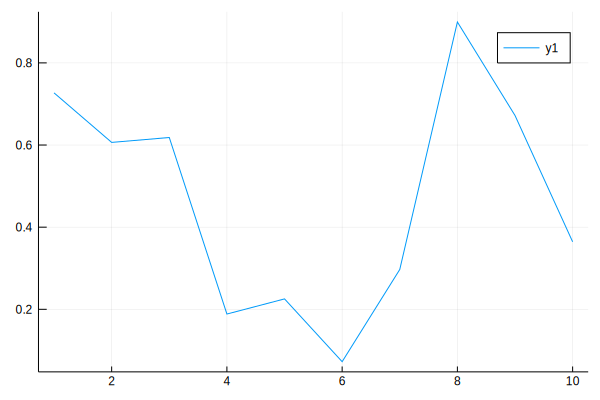

In [16]:
using Plots
plot(rand(10))

In [17]:
function f1(x)
    x = x^2
    return x+x
end

f1 (generic function with 1 method)

In [18]:
x=3
println(f1(x))

18
